#**Mengimport Library yang dibutuhkan**

In [2]:
# Tools for analysis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# **1. Data Preprocessing**

**Mengimport Datasheet**

In [3]:
data_moods = pd.read_csv('/content/data_moods.csv')
data_moods.head()

,name,album,artist,id,reledate,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature,mood
0,1999,1999,Prince,2H7PHVdQ3mXqEHXcvclTB0,1982-10-27,68,379266,0.866,0.13700,0.730,0.000000,0.0843,0.625,-8.201,0.0767,118.523,5,4,Happyase_
1,23,23,Blonde Redhead,4HIwL9ii9CcXpTOTzMq0MP,2007-04-16,43,318800,0.381,0.01890,0.832,0.196000,0.1530,0.166,-5.069,0.0492,120.255,8,4,Sad
2,9 Crimes,9,Damien Rice,5GZEeowhvSieFDiR8fQ2im,2006-11-06,60,217946,0.346,0.91300,0.139,0.000077,0.0934,0.116,-15.326,0.0321,136.168,0,4,Sad
3,99 Luftballons,99 Luftballons,Nena,6HA97v4wEGQ5TUClRM0XLc,1984-08-21,2,233000,0.466,0.08900,0.438,0.000006,0.1130,0.587,-12.858,0.0608,193.100,4,4,Happy
4,A Boy Brushed Red Living In Black And White,They're Only Chasing Safety,Underoath,47IWLfIKOKhFnz1FUEUIkE,2004-01-01,60,268000,0.419,0.00171,0.932,0.000000,0.1370,0.445,-3.604,0.1060,169.881,1,4,Energetic


In [5]:
print(data_moods.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 686 entries, 0 to 685
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              686 non-null    object 
 1   album             686 non-null    object 
 2   artist            686 non-null    object 
 3   id                686 non-null    object 
 4   reledate          686 non-null    object 
 5   popularity        686 non-null    int64  
 6   length            686 non-null    int64  
 7   danceability      686 non-null    float64
 8   acousticness      686 non-null    float64
 9   energy            686 non-null    float64
 10  instrumentalness  686 non-null    float64
 11  liveness          686 non-null    float64
 12  valence           686 non-null    float64
 13  loudness          686 non-null    float64
 14  speechiness       686 non-null    float64
 15  tempo             686 non-null    float64
 16  key               686 non-null    int64  
 1

**Menampilkan summary dari datasheet**

In [6]:
data_moods.describe()

,popularity,length,danceability,acousticness,energy,instrumentalness,liveness,valence,loudness,speechiness,tempo,key,time_signature
count,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000,686.000000
mean,41.534985,221791.485423,0.500553,0.449749,0.507693,0.349610,0.166867,0.342438,-11.531020,0.053946,119.134679,5.335277,3.870262
std,23.045707,63399.058492,0.158955,0.410729,0.326490,0.410517,0.142128,0.252304,7.468629,0.041374,28.978685,3.550858,0.500297
min,0.000000,76773.000000,0.078900,0.000005,0.001290,0.000000,0.031800,0.035300,-42.018000,0.023200,50.960000,0.000000,1.000000
25%,30.000000,179114.500000,0.388000,0.014825,0.202000,0.000034,0.092500,0.131250,-15.858750,0.033200,99.008750,2.000000,4.000000
50%,47.000000,213273.000000,0.505000,0.359000,0.495500,0.026350,0.111000,0.282000,-9.358000,0.040700,120.071000,6.000000,4.000000
75%,57.000000,254569.750000,0.612000,0.905750,0.844000,0.858250,0.173750,0.508750,-5.634500,0.057375,132.953250,9.000000,4.000000
max,88.000000,518373.000000,0.941000,0.996000,0.994000,0.966000,0.963000,0.977000,1.342000,0.416000,217.950000,11.000000,5.000000


**Perintah untuk menampilkan datasheet dari yang paling atas**

In [7]:
print(data_moods.head())

                                          name                        album  \
0                                         1999                         1999   
1                                           23                           23   
2                                     9 Crimes                            9   
3                               99 Luftballons               99 Luftballons   
4  A Boy Brushed Red Living In Black And White  They're Only Chasing Safety   

           artist                      id    reledate  popularity  length  \
0          Prince  2H7PHVdQ3mXqEHXcvclTB0  1982-10-27          68  379266   
1  Blonde Redhead  4HIwL9ii9CcXpTOTzMq0MP  2007-04-16          43  318800   
2     Damien Rice  5GZEeowhvSieFDiR8fQ2im  2006-11-06          60  217946   
3            Nena  6HA97v4wEGQ5TUClRM0XLc  1984-08-21           2  233000   
4       Underoath  47IWLfIKOKhFnz1FUEUIkE  2004-01-01          60  268000   

   danceability  acousticness  energy  instrumentalness  liven

**Mengganti nama kolom fitur "tempo", menjadi "Kecepatan"**

In [9]:
data_moods.rename(columns={'tempo': 'kecepatan'}, inplace=True)

**Mengecek nilai null pada kolom fitur maupun target**

In [10]:
print(data_moods.isnull().sum())

name                0
album               0
artist              0
id                  0
reledate            0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
kecepatan           0
key                 0
time_signature      0
mood                0
dtype: int64


**Mengecek Missing value pada datasheet**

In [11]:
# Mengecek jumlah missing values per kolom
missing_values = data_moods.isnull().sum()
print(missing_values)

name                0
album               0
artist              0
id                  0
reledate            0
popularity          0
length              0
danceability        0
acousticness        0
energy              0
instrumentalness    0
liveness            0
valence             0
loudness            0
speechiness         0
kecepatan           0
key                 0
time_signature      0
mood                0
dtype: int64


**Menghapus kolom target "time_signature " dan "loudness"**

In [13]:
# Menghapus kolom 'Wasting' dan 'loudness' dari dataset
stunting_data_cleaned = data_moods.drop(columns=['time_signature','loudness'])

# Menampilkan dataset setelah kolom dihapus
print(stunting_data_cleaned.head())

                                          name                        album  \
0                                         1999                         1999   
1                                           23                           23   
2                                     9 Crimes                            9   
3                               99 Luftballons               99 Luftballons   
4  A Boy Brushed Red Living In Black And White  They're Only Chasing Safety   

           artist                      id    reledate  popularity  length  \
0          Prince  2H7PHVdQ3mXqEHXcvclTB0  1982-10-27          68  379266   
1  Blonde Redhead  4HIwL9ii9CcXpTOTzMq0MP  2007-04-16          43  318800   
2     Damien Rice  5GZEeowhvSieFDiR8fQ2im  2006-11-06          60  217946   
3            Nena  6HA97v4wEGQ5TUClRM0XLc  1984-08-21           2  233000   
4       Underoath  47IWLfIKOKhFnz1FUEUIkE  2004-01-01          60  268000   

   danceability  acousticness  energy  instrumentalness  liven

In [16]:
# Menampilkan value unik dari kolom tertentu dengan filter untuk 'data_moods'
columns_to_check = ['popularity', 'danceability', 'energy', 'valence', 'mood']

# Menggunakan DataFrame yang telah dimuat sebelumnya
for column in columns_to_check:
    print(f"Kolom: {column}")

    if column == 'mood':
        # Menampilkan nilai unik dari kolom 'mood'
        print(data_moods[column].unique())
    else:
        # Menampilkan nilai unik untuk kolom selain 'mood'
        print(data_moods[column].unique())

    print("-" * 30)


Kolom: popularity
[68 43 60  2 27 29  1  0 55 52 53 38 84 24 13 51 39 85 22 63 36 58 44 56
 75 48 26 57 30 34 50 31 72 32 37 46 20 61 71 42 66 79 74 45 41 77 40 62
  5  9 47 78 54 11 59 70 76 49 28 35 23 87 19 33 69 21 65  3 83 73 12  8
  7 64 67 82 25 80 18 17 14 15 88]
------------------------------
Kolom: danceability
[0.866  0.381  0.346  0.466  0.419  0.394  0.504  0.586  0.603  0.331
 0.349  0.532  0.382  0.543  0.671  0.456  0.492  0.402  0.279  0.494
 0.189  0.429  0.488  0.422  0.737  0.363  0.391  0.486  0.463  0.693
 0.313  0.664  0.388  0.613  0.694  0.696  0.535  0.265  0.396  0.497
 0.383  0.512  0.401  0.471  0.399  0.408  0.541  0.44   0.572  0.732
 0.531  0.321  0.459  0.666  0.387  0.868  0.171  0.769  0.235  0.476
 0.407  0.548  0.612  0.667  0.438  0.441  0.249  0.519  0.627  0.443
 0.446  0.775  0.537  0.621  0.45   0.552  0.663  0.736  0.31   0.554
 0.186  0.435  0.374  0.507  0.614  0.341  0.699  0.18   0.421  0.607
 0.351  0.431  0.941  0.619  0.567  0.305  0.19

In [17]:
# Mengambil data yang hanya memiliki mood tertentu
filtered_moods = ['Happy', 'Sad']  # Contoh filter mood
data_moods_cleaned = data_moods[data_moods['mood'].isin(filtered_moods)]

# Menggunakan fitur yang tersisa
X = data_moods_cleaned[['popularity', 'danceability', 'energy', 'valence']]  # Fitur numerik
y = data_moods_cleaned['mood']  # Target adalah kolom 'mood'

# Menampilkan informasi dataset yang telah difilter
print("Fitur (X):")
print(X.head())
print("\nTarget (y):")
print(y.head())


Fitur (X):
    popularity  danceability  energy  valence
1           43         0.381   0.832    0.166
2           60         0.346   0.139    0.116
3            2         0.466   0.438    0.587
7            1         0.586   0.935    0.580
14          84         0.671   0.373    0.732

Target (y):
1       Sad
2       Sad
3     Happy
7     Happy
14    Happy
Name: mood, dtype: object


In [18]:
from sklearn.preprocessing import LabelEncoder

# Menghapus kolom yang tidak diperlukan
data_moods_cleaned = data_moods.drop(columns=['id', 'reledate', 'speechiness'])

# Filter data untuk hanya menyertakan kategori tertentu di kolom 'mood'
filtered_moods = ['Happy', 'Sad']  # Contoh filter
data_moods_filtered = data_moods_cleaned[data_moods_cleaned['mood'].isin(filtered_moods)]

# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengonversi kolom 'mood' menjadi numerik
data_moods_filtered['mood'] = label_encoder.fit_transform(data_moods_filtered['mood'])

# Menampilkan mapping kategori ke angka
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Mapping kategori ke angka:", label_mapping)

# Menampilkan hasil dataset setelah konversi
print(data_moods_filtered.head())


Mapping kategori ke angka: {'Happy': 0, 'Sad': 1}
                                                 name  \
1                                                  23   
2                                            9 Crimes   
3                                      99 Luftballons   
7   A Little Less Conversation - JXL Radio Edit Remix   
14                                             Africa   

                              album          artist  popularity  length  \
1                                23  Blonde Redhead          43  318800   
2                                 9     Damien Rice          60  217946   
3                    99 Luftballons            Nena           2  233000   
7   Elvis 75 - Good Rockin' Tonight   Elvis Presley           1  211173   
14                          Toto IV            TOTO          84  295893   

    danceability  acousticness  energy  instrumentalness  liveness  valence  \
1          0.381      0.018900   0.832          0.196000    0.1530    0.166  

**Matriks Koorelasinya**

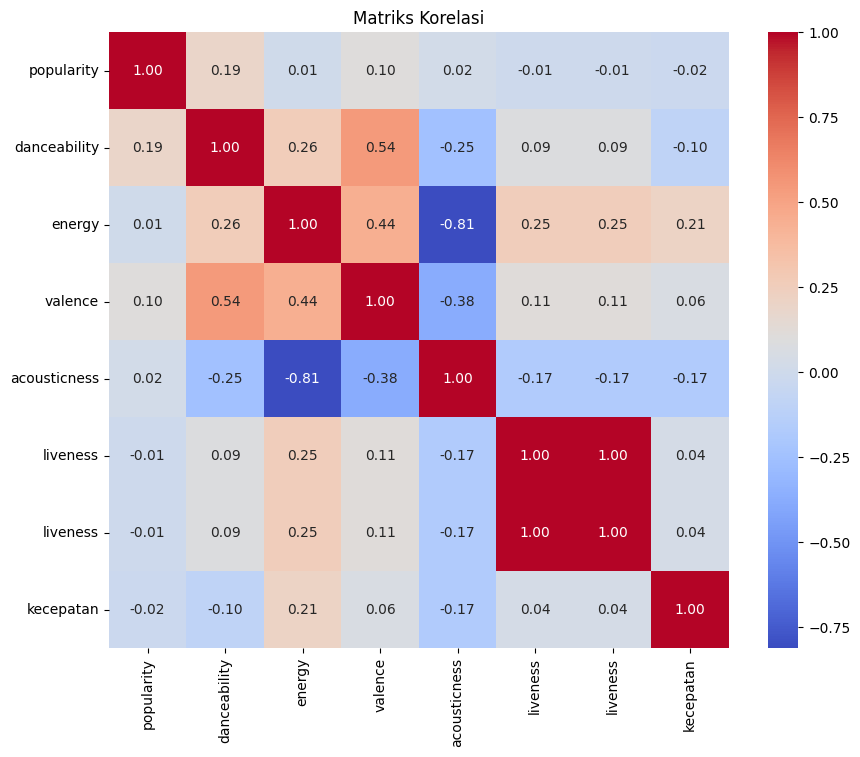

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung matriks korelasi untuk kolom numerik
numeric_columns = ['popularity', 'danceability', 'energy', 'valence', 'acousticness',
                   'liveness', 'liveness', 'kecepatan']
correlation_matrix = data_moods_filtered[numeric_columns].corr()

# Buat heatmap
plt.figure(figsize=(10, 8))  # Atur ukuran figure
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()


# **EDA**

**a. PIE CHART**

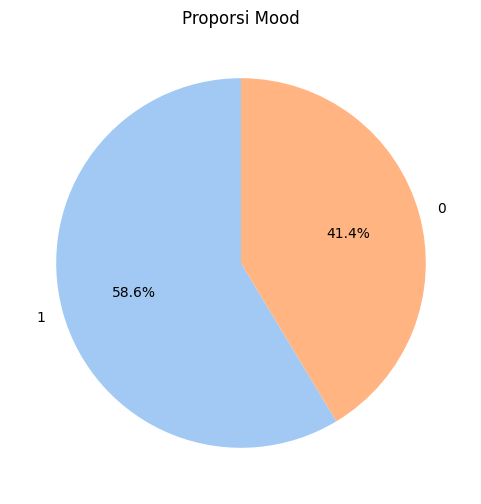

In [21]:
import matplotlib.pyplot as plt

# Hitung jumlah data untuk setiap kategori mood
mood_counts = data_moods_filtered['mood'].value_counts()

# Buat pie chart
plt.figure(figsize=(6, 6))  # Atur ukuran figure
plt.pie(mood_counts, labels=mood_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Proporsi Mood')
plt.show()


**b. BAR CHART**

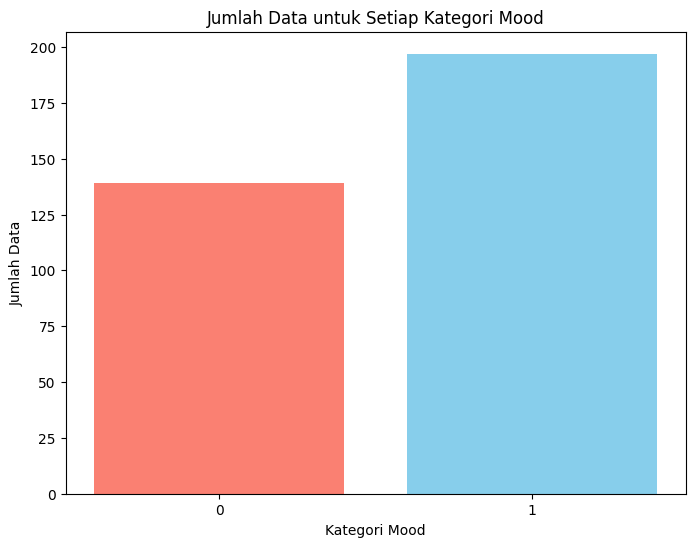

In [22]:
# Hitung jumlah data untuk setiap kategori mood
mood_counts = data_moods_filtered['mood'].value_counts()

# Kategori dan jumlah data
categories = mood_counts.index
counts = mood_counts.values

# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(categories, counts, color=['skyblue', 'salmon'])
plt.title('Jumlah Data untuk Setiap Kategori Mood')
plt.xlabel('Kategori Mood')
plt.ylabel('Jumlah Data')

# Menggunakan label asli dengan label_mapping
plt.xticks(categories, [label_mapping[cat] if cat in label_mapping else cat for cat in categories])
plt.show()


**c. HISTOGRAM**

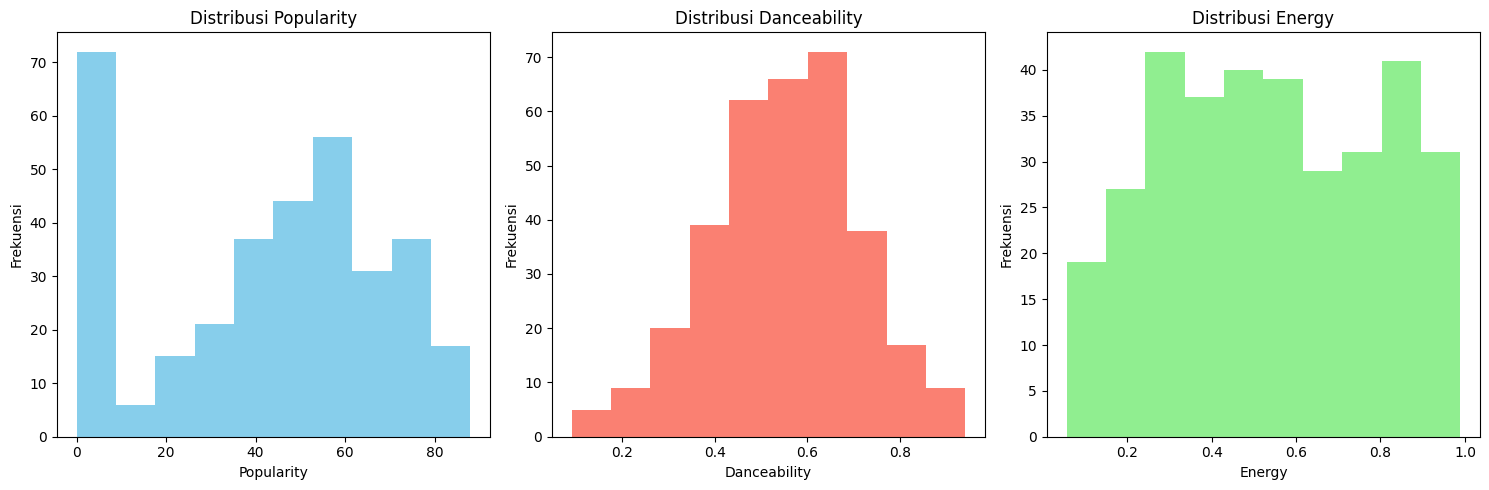

In [23]:
plt.figure(figsize=(15, 5))

# Histogram untuk 'popularity'
plt.subplot(1, 3, 1)  # 1 baris, 3 kolom, plot pertama
plt.hist(data_moods_filtered['popularity'], bins=10, color='skyblue')
plt.title('Distribusi Popularity')
plt.xlabel('Popularity')
plt.ylabel('Frekuensi')

# Histogram untuk 'danceability'
plt.subplot(1, 3, 2)  # 1 baris, 3 kolom, plot kedua
plt.hist(data_moods_filtered['danceability'], bins=10, color='salmon')
plt.title('Distribusi Danceability')
plt.xlabel('Danceability')
plt.ylabel('Frekuensi')

# Histogram untuk 'energy'
plt.subplot(1, 3, 3)  # 1 baris, 3 kolom, plot ketiga
plt.hist(data_moods_filtered['energy'], bins=10, color='lightgreen')
plt.title('Distribusi Energy')
plt.xlabel('Energy')
plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()


**d. BOX PLOT**

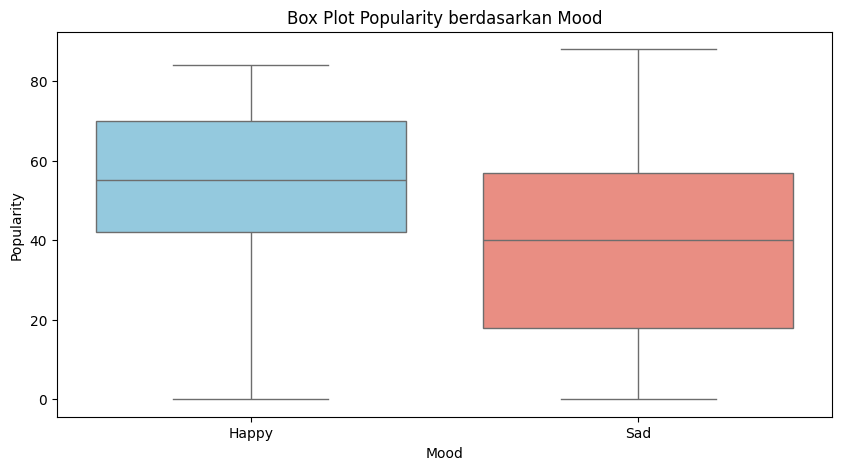

In [24]:
plt.figure(figsize=(10, 5))

# Box plot untuk 'popularity'
sns.boxplot(x='mood', y='popularity', data=data_moods_filtered, palette=['skyblue', 'salmon'])
plt.title('Box Plot Popularity berdasarkan Mood')

# Menggunakan label asli dengan label_mapping dan nilai numerik
plt.xticks(ticks=range(len(label_encoder.classes_)), labels=label_encoder.classes_)  # Menampilkan label asli
plt.xlabel('Mood')
plt.ylabel('Popularity')
plt.show()


**Melakukan encoding**

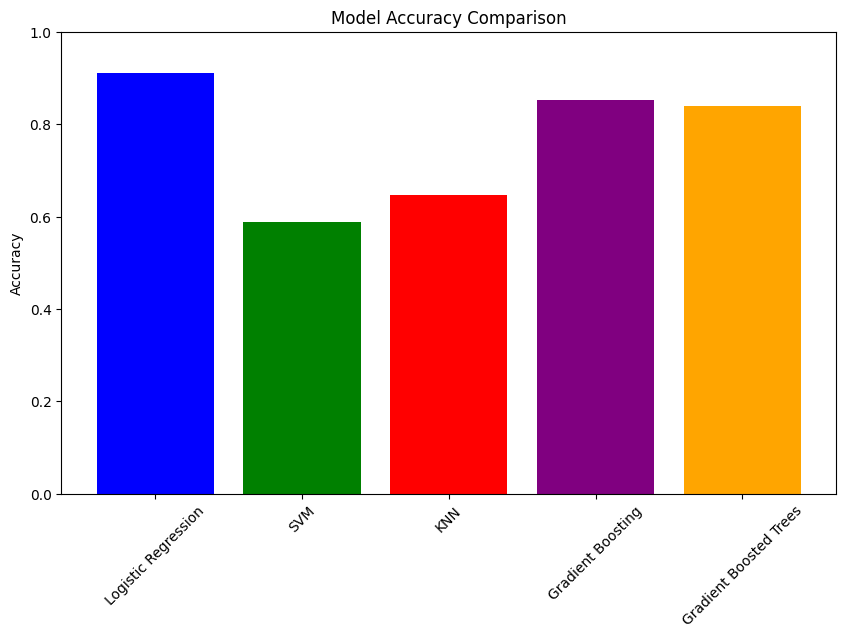

Logistic Regression:
  Accuracy: 0.91
  Precision: 0.91
  Recall: 0.91
  F1-Score: 0.91
--------------------------------------------------
SVM:
  Accuracy: 0.59
  Precision: 0.57
  Recall: 0.56
  F1-Score: 0.56
--------------------------------------------------
KNN:
  Accuracy: 0.65
  Precision: 0.64
  Recall: 0.64
  F1-Score: 0.64
--------------------------------------------------
Gradient Boosting:
  Accuracy: 0.85
  Precision: 0.85
  Recall: 0.85
  F1-Score: 0.85
--------------------------------------------------
Gradient Boosted Trees:
  Accuracy: 0.84
  Precision: 0.84
  Recall: 0.85
  F1-Score: 0.84
--------------------------------------------------


In [25]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Split dataset menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Model Building
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Gradient Boosted Trees": HistGradientBoostingClassifier()
}

# Dictionary untuk menyimpan hasil
accuracies = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Melatih dan menguji model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Menghitung metrik
    accuracies[name] = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Simpan nilai precision, recall, f1-score untuk masing-masing model
    precision_scores[name] = report['macro avg']['precision']
    recall_scores[name] = report['macro avg']['recall']
    f1_scores[name] = report['macro avg']['f1-score']

# 4. Visualisasi Akurasi
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Print akurasi, precision, recall, f1-score untuk setiap model
for name in models.keys():
    print(f"{name}:")
    print(f"  Accuracy: {accuracies[name]:.2f}")
    print(f"  Precision: {precision_scores[name]:.2f}")
    print(f"  Recall: {recall_scores[name]:.2f}")
    print(f"  F1-Score: {f1_scores[name]:.2f}")
    print("-" * 50)


#**Menyimpan Model yang sudah ditentukan**

In [26]:
import joblib

# Simpan model Gradient Boosted Trees ke file
model_filename = "GradientBoostedTrees.pkl"
joblib.dump(models["Gradient Boosted Trees"], model_filename)
print(f"Model Gradient Boosted Trees berhasil disimpan ke file: {model_filename}")


Model Gradient Boosted Trees berhasil disimpan ke file: GradientBoostedTrees.pkl


#**Lalu melakukan Split dan Scaling data dan meyimpannya**

In [29]:
# 1. Load Dataset
data_moods = pd.read_csv('/content/data_moods.csv')

# 2. Pilih kolom yang relevan
selected_columns = ['name', 'artist', 'popularity', 'mood', 'danceability', 'energy', 'valence']
data_moods = data_moods[selected_columns]

# 3. Pisahkan fitur (X) dan label (y)
X = data_moods.drop(columns=['mood'])  # Fitur
y = data_moods['mood']  # Label (target)

# 4. Split Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# 5. Preprocessing (Scaling)
from sklearn.preprocessing import StandardScaler

# Pilih hanya kolom numerik untuk scaling
numerical_columns = ['popularity', 'danceability', 'energy', 'valence']
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# 6. Simpan Scaler
import joblib
scaler_filename = "Scaler.pkl"
joblib.dump(scaler, scaler_filename)
print(f"Scaler telah disimpan ke file: {scaler_filename}")

# 7. Load Scaler (untuk


Scaler telah disimpan ke file: Scaler.pkl


#**Melakukan prediksi dengan model yang sudah ditentukan diatas**

In [30]:
import joblib
import numpy as np
import pandas as pd

# Data baru (contoh nilai: popularity, danceability, energy, valence)
new_data = np.array([[75, 0.8, 0.7, 0.6]])  # Ganti nilai sesuai kebutuhan

# Ubah data baru ke DataFrame
new_data_df = pd.DataFrame(new_data, columns=['popularity', 'danceability', 'energy', 'valence'])

# Memuat scaler dari file
scaler_filename = "Scaler.pkl"
loaded_scaler = joblib.load(scaler_filename)

# Scale data baru
new_data_scaled = loaded_scaler.transform(new_data_df)

# Memuat model Gradient Boosted Trees dari file
model_filename = "GradientBoostedTrees.pkl"
loaded_model = joblib.load(model_filename)

# Prediksi menggunakan model
hasil = loaded_model.predict(new_data_scaled)

# Tampilkan hasil prediksi
print(f"Prediksi: {hasil[0]}")


Prediksi: Happy
